In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df_lessons=pd.read_csv("lessons_code.csv").copy()

In [3]:
df_comments =pd.read_csv("students_final2.csv").copy()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df_lessons.loc[df_lessons['Lesson Code'].str.contains(' '), 'Lesson Hours'] = df_lessons['Lesson Date']
df_lessons.loc[df_lessons['Lesson Code'].str.contains(' '), 'Lesson Date'] = df_lessons['Teacher Name']
df_lessons.loc[df_lessons['Lesson Code'].str.contains(' '), 'Teacher Name'] = '-'
df_lessons["Number"]=df_lessons["Lesson Code"].str.extract('(\d+)')
df_lessons["String"]=df_lessons["Lesson Code"].str.extract('(\D+)',expand=False).str.strip()
df_lessons["Education Level"]=""
df_lessons.loc[df_lessons['Number'].str.startswith('5'), 'Education Level'] = 'Master'
df_lessons.loc[df_lessons['Number'].str.startswith('6'), 'Education Level'] = 'Master'
df_lessons.loc[df_lessons['Number'].str.startswith('7'), 'Education Level'] = 'PHD'
df_lessons.loc[df_lessons['Number'].str.startswith('8'), 'Education Level'] = 'PHD'
df_lessons.loc[df_lessons['Number'].str.startswith('1'), 'Education Level'] = 'Undergraduate'
df_lessons.loc[df_lessons['Number'].str.startswith('2'), 'Education Level'] = 'Undergraduate'
df_lessons.loc[df_lessons['Number'].str.startswith('3'), 'Education Level'] = 'Undergraduate'
df_lessons.loc[df_lessons['Number'].str.startswith('4'), 'Education Level'] = 'Undergraduate'
df_lessons["Year"]=""
df_lessons.loc[df_lessons['Number'].str.startswith('5'), 'Year'] = 5
df_lessons.loc[df_lessons['Number'].str.startswith('6'), 'Year'] = 6
df_lessons.loc[df_lessons['Number'].str.startswith('7'), 'Year'] = 7
df_lessons.loc[df_lessons['Number'].str.startswith('8'), 'Year'] = 8
df_lessons.loc[df_lessons['Number'].str.startswith('1'), 'Year'] = 1
df_lessons.loc[df_lessons['Number'].str.startswith('2'), 'Year'] = 2
df_lessons.loc[df_lessons['Number'].str.startswith('3'), 'Year'] = 3
df_lessons.loc[df_lessons['Number'].str.startswith('4'), 'Year'] = 4
df_lessons['Lesson'] = df_lessons['String'] + df_lessons['Number']
df_lessons.fillna('-',inplace=True)

In [6]:
df_lab_lessons = df_lessons[df_lessons['Lesson Code'].str.contains(' ')]
df_undergraduate_lessons = df_lessons[df_lessons['Education Level'].str.contains('Undergraduate')]
df_no_lab_lessons = df_lessons[df_lessons['Teacher Name'].str.contains(' ')]

In [7]:
df_lessons.isnull().sum()

Lesson Code        0
Lesson Name        0
Teacher Name       0
Lesson Date        0
Lesson Hours       0
Lesson Credit      0
Number             0
String             0
Education Level    0
Year               0
Lesson             0
dtype: int64

In [8]:
#print(f"{df_lessons['Teacher Name'].value_counts()}\n")

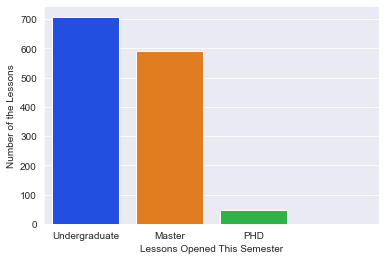

In [9]:
sns.set_style('darkgrid')
ax =sns.countplot(x = 'Education Level', data = df_lessons.drop_duplicates(['String','Lesson']),palette = 'bright')
ax.set(xlabel='Lessons Opened This Semester', ylabel='Number of the Lessons')
plt.show()

In [10]:
df_lessons.head(10)

,Lesson Code,Lesson Name,Teacher Name,Lesson Date,Lesson Hours,Lesson Credit,Number,String,Education Level,Year,Lesson
0,AD102.01,INTRODUCTION TO MANAGEMENT,STAFF STAFF,📅 TTT,⏱️ 91011,3 Cr 5 ECTS,102,AD,Undergraduate,1,AD102
1,AD131.01,INTRO. TO LAW I,MEHMET ARTEMEL,📅 ThThTh,⏱️ 678,3 Cr 4 ECTS,131,AD,Undergraduate,1,AD131
2,AD131.02,INTRO. TO LAW I,MEHMET ARTEMEL,📅 FFF,⏱️ 678,3 Cr 4 ECTS,131,AD,Undergraduate,1,AD131
3,AD211.01,FINANCIAL ACCOUNTING FOR ECONOMISTS,FATİH F.YILMAZ,📅 MMM,⏱️ 123,3 Cr 4 ECTS,211,AD,Undergraduate,2,AD211
4,AD213.01,FINANCIAL ACCOUNTING,ALİ COŞKUN,📅 TTT,⏱️ 234,3 Cr 5 ECTS,213,AD,Undergraduate,2,AD213
5,AD213.02,FINANCIAL ACCOUNTING,ALİ COŞKUN,📅 WWW,⏱️ 234,3 Cr 5 ECTS,213,AD,Undergraduate,2,AD213
6,AD216.01,FINANCIAL & COST ACCOUNTING,UĞUR AKDOĞAN,📅 ThFFF,⏱️ 6678,4 Cr 6 ECTS,216,AD,Undergraduate,2,AD216
7,AD220.01,MANAGEMENT OF ORGANIZATIONS,ÖZGÜN BURCU RODOPMAN,📅 ThThTh,⏱️ 234,3 Cr 5 ECTS,220,AD,Undergraduate,2,AD220
8,AD251.02,MANAGERIAL STATISTICS I,NESRİN OKAY AKMAN,📅 MMM,⏱️ 345,3 Cr 5 ECTS,251,AD,Undergraduate,2,AD251
9,AD302.01,RESEARCH METHODS,BELGİN ARISAN,📅 ThThTh,⏱️ 234,3 Cr 6 ECTS,302,AD,Undergraduate,3,AD302


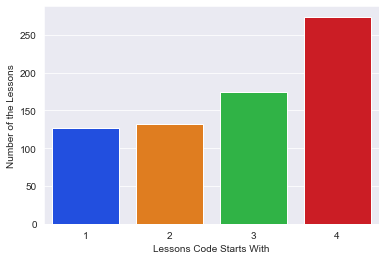

In [11]:
sns.set_style('darkgrid')
ax =sns.countplot(x = 'Year', data = df_undergraduate_lessons.drop_duplicates(['String','Lesson']),palette = 'bright')
ax.set(xlabel='Lessons Code Starts With', ylabel='Number of the Lessons')
plt.show()

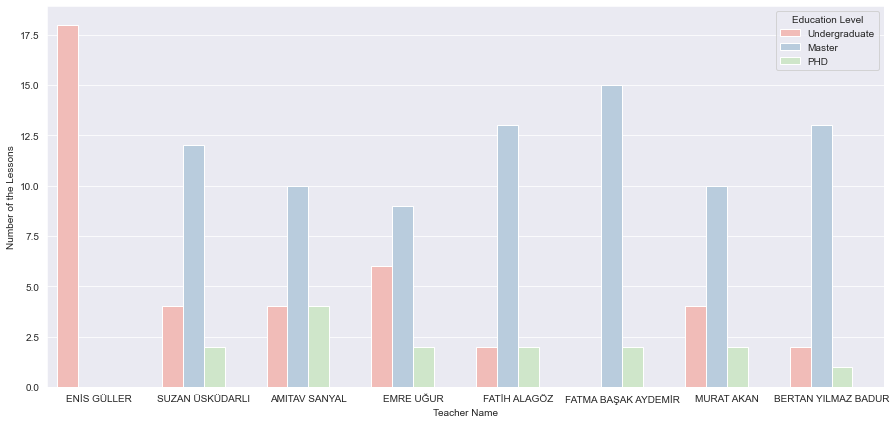

In [12]:
plt.figure(figsize = (15,7))
sns.set_style('darkgrid')
ax =sns.countplot(x = 'Teacher Name', data = df_lessons,palette = 'Pastel1',order=pd.value_counts(df_lessons["Teacher Name"]).iloc[3:11].index,hue="Education Level")
ax.set(xlabel='Teacher Name', ylabel='Number of the Lessons')
plt.show()


In [13]:
df_comments["Number"]=df_comments["Lesson Name"].str.extract('(\d+)')
df_comments["String"]=df_comments["Lesson Name"].str.extract('(\D+)',expand=False).str.strip()

In [14]:
df_comments["Education Level"]=""
df_comments.loc[df_comments['Number'].str.startswith('5'), 'Education Level'] = 'Master'
df_comments.loc[df_comments['Number'].str.startswith('6'), 'Education Level'] = 'Master'
df_comments.loc[df_comments['Number'].str.startswith('7'), 'Education Level'] = 'PHD'
df_comments.loc[df_comments['Number'].str.startswith('8'), 'Education Level'] = 'PHD'
df_comments.loc[df_comments['Number'].str.startswith('1'), 'Education Level'] = 'Undergraduate'
df_comments.loc[df_comments['Number'].str.startswith('2'), 'Education Level'] = 'Undergraduate'
df_comments.loc[df_comments['Number'].str.startswith('3'), 'Education Level'] = 'Undergraduate'
df_comments.loc[df_comments['Number'].str.startswith('4'), 'Education Level'] = 'Undergraduate'
df_comments["Year"]=""
df_comments.loc[df_comments['Number'].str.startswith('5'), 'Year'] = 5
df_comments.loc[df_comments['Number'].str.startswith('6'), 'Year'] = 6
df_comments.loc[df_comments['Number'].str.startswith('7'), 'Year'] = 7
df_comments.loc[df_comments['Number'].str.startswith('8'), 'Year'] = 8
df_comments.loc[df_comments['Number'].str.startswith('1'), 'Year'] = 1
df_comments.loc[df_comments['Number'].str.startswith('2'), 'Year'] = 2
df_comments.loc[df_comments['Number'].str.startswith('3'), 'Year'] = 3
df_comments.loc[df_comments['Number'].str.startswith('4'), 'Year'] = 4

In [15]:
df_comments.head(10)

,Username,Lesson Name,Teacher Name,Text,Point,Number,String,Education Level,Year
0,elif,SOC101,Ali Tuna Kuyucu,elif SOC101 dersini Ali Tuna Kuyucu hocasından...,0.0,101,SOC,Undergraduate,1
1,Zeynep837,SOC101,Ali Tuna Kuyucu,Zeynep837 SOC101 dersini Ali Tuna Kuyucu hocas...,0.0,101,SOC,Undergraduate,1
2,mrymsygili,SOC101,Ali Tuna Kuyucu,mrymsygili SOC101 dersini Ali Tuna Kuyucu hoca...,0.0,101,SOC,Undergraduate,1
3,cengin,SOC101,Ali Tuna Kuyucu,cengin SOC101 dersini Ali Tuna Kuyucu hocasınd...,0.0,101,SOC,Undergraduate,1
4,tylerdurden,SOC101,Ali Tuna Kuyucu,tylerdurden SOC101 dersini Ali Tuna Kuyucu hoc...,0.0,101,SOC,Undergraduate,1
5,Lagertha,SOC101,Ali Tuna Kuyucu,Lagertha SOC101 dersini Ali Tuna Kuyucu hocası...,0.0,101,SOC,Undergraduate,1
6,nickim,SOC101,Ali Tuna Kuyucu,nickim SOC101 dersini Ali Tuna Kuyucu hocasınd...,0.0,101,SOC,Undergraduate,1
7,Goat,SOC101,Ali Tuna Kuyucu,Goat SOC101 dersini Ali Tuna Kuyucu hocasından...,0.0,101,SOC,Undergraduate,1
8,engincan,SOC101,Ali Tuna Kuyucu,engincan SOC101 dersini Ali Tuna Kuyucu hocası...,0.0,101,SOC,Undergraduate,1
9,_Karınca_,SOC101,Ali Tuna Kuyucu,Eğer hiperaktif biriyseniz bu hoca size çok ya...,0.0,101,SOC,Undergraduate,1


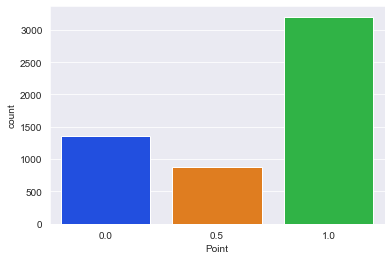

In [16]:
sns.set_style('darkgrid')
sns.countplot(x  = 'Point',  data = df_comments, palette = "bright");

In [17]:
print(df_comments["Point"].mean())
print(df_comments["Point"].value_counts()[0])
print(df_comments["Point"].value_counts()[0.5])
print(df_comments["Point"].value_counts()[1])

0.6695772058823529
1358
879
3203


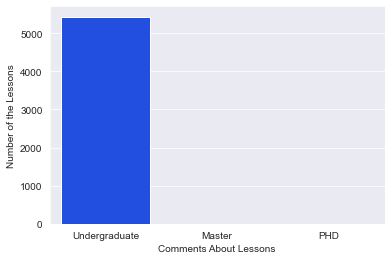

In [18]:
#plt.figure(figsize = (10,8))
sns.set_style('darkgrid')
ax =sns.countplot(x = 'Education Level', data = df_comments,palette = 'bright')
ax.set(xlabel='Comments About Lessons', ylabel='Number of the Lessons')
plt.show()

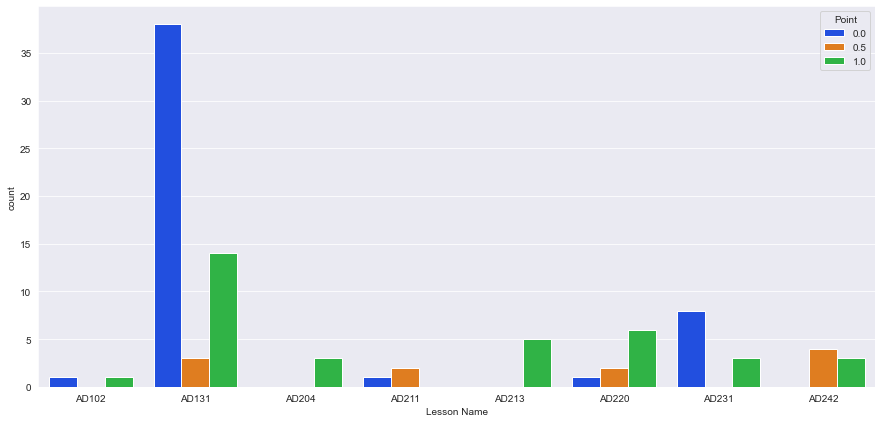

In [51]:
plt.figure(figsize = (15,7))
sns.set_style('darkgrid')
sns.countplot(x  = 'Lesson Name',  data = df_comments, palette = 'bright',order=df_comments.groupby("Lesson Name")["Point"].mean().iloc[:8].index, hue="Point");
plt.show()

SyntaxError: EOL while scanning string literal (1196981080.py, line 3)

<Figure size 1440x504 with 0 Axes>

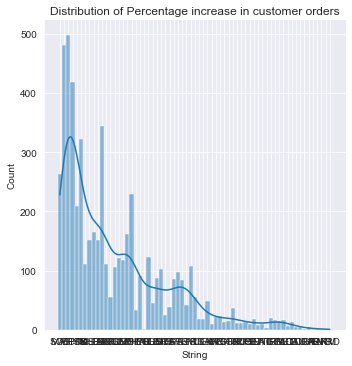

In [21]:
plt.figure(figsize = (20,7))
sns.displot(x='String', kde=True, data=df_comments, palette='dark:salmon_r')
plt.title("Distribution of Percentage increase in customer orders")
plt.show()

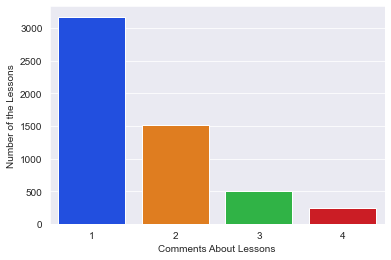

In [22]:
sns.set_style('darkgrid')
ax =sns.countplot(x = 'Year', data = df_comments,palette = 'bright',order=pd.value_counts(df_comments["Year"]).iloc[:4].index,)
ax.set(xlabel='Comments About Lessons', ylabel='Number of the Lessons')
plt.show()

In [23]:
df_math101_comments = df_comments[df_comments["Lesson Name"].str.contains("MATH101")]
df_ec101_comments = df_comments[df_comments["Lesson Name"].str.contains("EC101")]

In [24]:
df_math101_comments.head(5)

,Username,Lesson Name,Teacher Name,Text,Point,Number,String,Education Level,Year
176,bounpecetesi,MATH101,Betül Tanbay,bounpecetesi MATH101 dersini Betül Tanbay hoca...,0.0,101,MATH,Undergraduate,1
177,allah,MATH101,Betül Tanbay,allah MATH101 dersini Betül Tanbay hocasından ...,0.0,101,MATH,Undergraduate,1
178,muhibbi,MATH101,Betül Tanbay,muhibbi MATH101 dersini Betül Tanbay hocasında...,0.0,101,MATH,Undergraduate,1
179,reyhann,MATH101,Betül Tanbay,reyhann MATH101 dersini Betül Tanbay hocasında...,0.0,101,MATH,Undergraduate,1
180,FK,MATH101,Betül Tanbay,FK MATH101 dersini Betül Tanbay hocasından şid...,0.0,101,MATH,Undergraduate,1


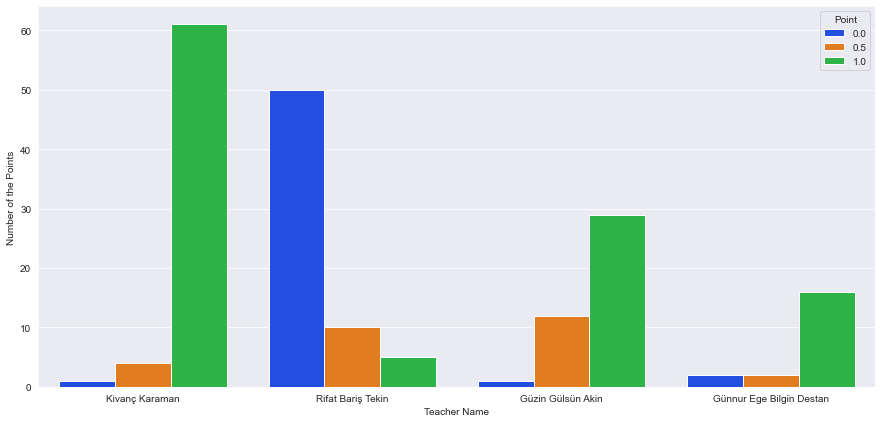

In [25]:
plt.figure(figsize = (15,7))
sns.set_style('darkgrid')
ax =sns.countplot(x = 'Teacher Name', data = df_ec101_comments,palette = 'bright',order=pd.value_counts(df_ec101_comments["Teacher Name"]).iloc[:4].index,hue="Point")
ax.set(xlabel='Teacher Name', ylabel='Number of the Points')
plt.show()

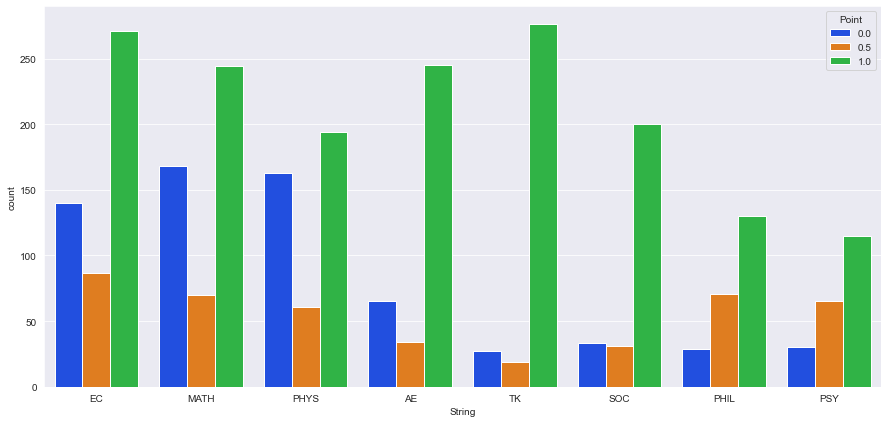

In [26]:
plt.figure(figsize = (15,7))
sns.set_style('darkgrid')
sns.countplot(x  = 'String',  data = df_comments, palette = 'bright',order=pd.value_counts(df_comments["String"]).iloc[:8].index, hue="Point");
plt.show()